In [7]:
# !pip install tensorflow
# !pip install numpy
# !pip install pandas
# !pip install matplotlib

In [8]:
from pathlib import Path
import imghdr
import os

data_dir = "hair_types"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

image_size = (64, 64)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "hair_types/",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    labels='inferred',
    label_mode='categorical'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "hair_types/",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size, 
    labels='inferred',
    label_mode='categorical'
)

Found 985 files belonging to 3 classes.
Using 788 files for training.
Found 985 files belonging to 3 classes.
Using 197 files for validation.


2024-04-09 09:32:22.234405: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [788]
	 [[{{node Placeholder/_4}}]]
2024-04-09 09:32:22.234761: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [788]
	 [[{{node Placeholder/_4}}]]


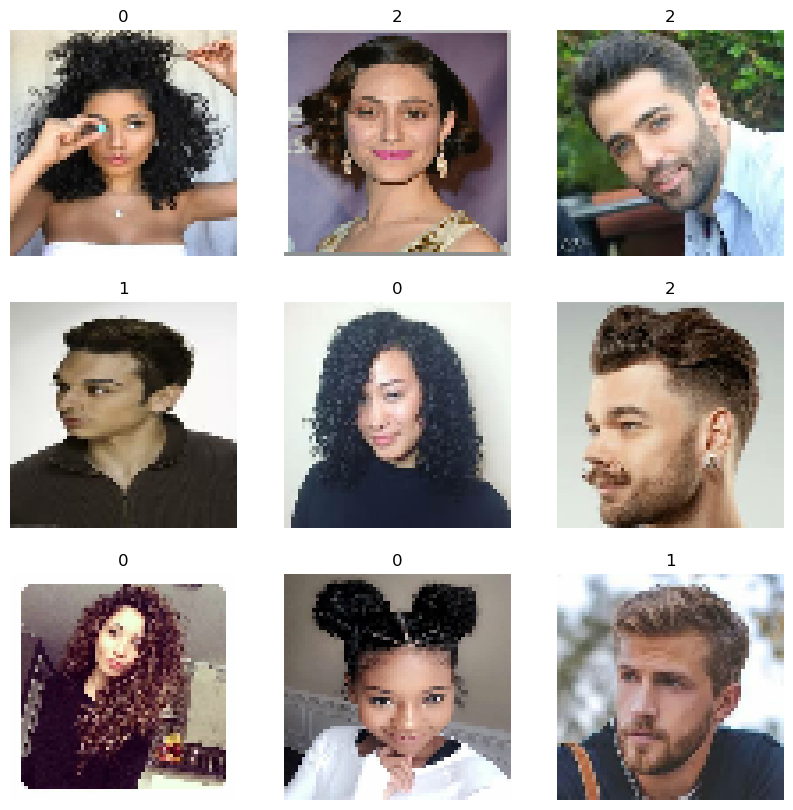

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(np.argmax(labels[i])))
        plt.axis("off")
plt.show()

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(keras.Input(shape=image_size + (3,))) # 64, 64, 3
model.add(layers.Rescaling(1.0 / 255))

model.add(layers.Conv2D(filters=4, kernel_size=16, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(filters=8, kernel_size=8, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(filters=16, kernel_size=4, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64))
model.add(layers.Activation("relu"))
model.add(layers.Dense(3))
model.add(layers.Activation("softmax"))

tf.keras.utils.plot_model(model, to_file='model_test.png', show_shapes=True)

epochs = 50

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(train_ds, epochs=epochs, validation_data=val_ds)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Epoch 1/50


2024-04-09 09:32:23.148770: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [788]
	 [[{{node Placeholder/_4}}]]
2024-04-09 09:32:23.148962: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [788]
	 [[{{node Placeholder/_0}}]]


24/25 [===========================>..] - ETA: 0s - loss: 1.0993 - accuracy: 0.3138

2024-04-09 09:32:26.198688: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [197]
	 [[{{node Placeholder/_4}}]]
2024-04-09 09:32:26.198880: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [197]
	 [[{{node Placeholder/_4}}]]


25/25 [==============================] - 4s 115ms/step - loss: 1.0991 - accuracy: 0.3160 - val_loss: 1.0921 - val_accuracy: 0.4010
Epoch 2/50
25/25 [==============================] - 3s 110ms/step - loss: 1.0931 - accuracy: 0.3896 - val_loss: 1.0808 - val_accuracy: 0.4061
Epoch 3/50
25/25 [==============================] - 3s 107ms/step - loss: 1.0726 - accuracy: 0.4277 - val_loss: 1.0442 - val_accuracy: 0.4822
Epoch 4/50
25/25 [==============================] - 3s 105ms/step - loss: 1.0297 - accuracy: 0.4518 - val_loss: 1.1334 - val_accuracy: 0.3503
Epoch 5/50
25/25 [==============================] - 3s 109ms/step - loss: 1.0019 - accuracy: 0.5051 - val_loss: 1.0381 - val_accuracy: 0.4518
Epoch 6/50
25/25 [==============================] - 3s 104ms/step - loss: 1.0089 - accuracy: 0.4734 - val_loss: 1.0476 - val_accuracy: 0.4518
Epoch 7/50
25/25 [==============================] - 3s 107ms/step - loss: 0.9979 - accuracy: 0.5178 - val_loss: 1.0269 - val_accuracy: 0.4670
Epoch 8/50
25/25 

In [12]:
img = keras.preprocessing.image.load_img(
    "hair_types/Curly_Hair/02dac897d1dec9ba8c057a11d041ada8--layered-natural-hair-natural-black-hairstyles.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(
    "This image is %.2f percent curly hair, %.2f percent straight hair, and %.2f percent wavy hair."
    % tuple(predictions[0])
)


1/1 [==============================] - 0s 55ms/step
This image is 0.90 percent curly hair, 0.08 percent straight hair, and 0.02 percent wavy hair.
